<a href="https://colab.research.google.com/github/AG-2002/Credit_Card_Fraud_Detection/blob/main/Credit_card_Fraud_Detection(Data_Cleaning_and_EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud Detection (Classification): Predict if a transaction is fraudulent.**

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [341]:
# Load CSV with pandas

df=pd.read_csv('fraud_data.csv')
df.head(10)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
5,05-01-2019 03:15,"""Raynor, Reinger and Hagenes""",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,ef010a5f4f570d306a050a368ee2729d,64.088838,-165.104078,1
6,05-01-2019 03:21,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,8e2d2fae5319d31c887dddbc70627ac4,63.917785,-165.827621,1
7,05-01-2019 11:31,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,14-07-1954,5fbe827807ec9f557f6242bb48db0e51,39.167065,-93.705245,1
8,05-01-2019 18:03,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,fba83e0a3adb530251295ab72a96b719,64.623325,-166.403973,1
9,05-01-2019 22:02,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,b87c92d4824758e704da572891697fed,65.266065,-164.865352,1


In [342]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [344]:
df.isnull().sum()

,0
trans_date_trans_time,0
merchant,0
category,0
amt,0
city,0
state,0
lat,0
long,0
city_pop,0
job,0


In [345]:
# Check class balance of the target (fraud vs not fraud)

df.iloc[:, -1].value_counts()

,count
is_fraud,
0,12600
1,1844
"1""2020-12-24 16:56:24""",1
"0""2019-01-01 00:00:44""",1


In [346]:
df = df[df['is_fraud'] != '1"2020-12-24 16:56:24"']
df = df[df['is_fraud'] != '0"2019-01-01 00:00:44"']

# Data Preprocessing

In [347]:
# CALCULATING THE AGE OF THE MERCHANTS FROM DOB AND TRANSANCTION YEAR

df['customer_birth_year'] = pd.DatetimeIndex(df['dob']).year
df['transaction_year'] = pd.DatetimeIndex(df['trans_date_trans_time']).year
df['transaction_month'] = pd.DatetimeIndex(df['trans_date_trans_time']).month_name()
df['transaction_day'] = pd.DatetimeIndex(df['trans_date_trans_time']).day
df['transaction_hour'] = pd.DatetimeIndex(df['trans_date_trans_time']).hour
df['transaction_day_name'] = pd.DatetimeIndex(df['trans_date_trans_time']).day_name()
df['age_of_customer_on_transaction_year'] = df['transaction_year']-df['customer_birth_year']

print(df)

      trans_date_trans_time                          merchant        category  \
0          04-01-2019 00:58  "Stokes, Christiansen and Sipes"     grocery_net   
1          04-01-2019 15:06                      Predovic Inc    shopping_net   
2          04-01-2019 22:37                   Wisozk and Sons        misc_pos   
3          04-01-2019 23:06                    Murray-Smitham     grocery_pos   
4          04-01-2019 23:59                        Friesen Lt  health_fitness   
...                     ...                               ...             ...   
14441      22-01-2019 00:37                      Hudson-Grady    shopping_pos   
14442      22-01-2019 00:41    "Nienow, Ankunding and Collie"        misc_pos   
14443      22-01-2019 00:42                  Pacocha-O'Reilly     grocery_pos   
14444      22-01-2019 00:48     "Bins, Balistreri and Beatty"    shopping_pos   
14445      22-01-2019 00:55                Daugherty-Thompson     food_dining   

          amt        city s

In [348]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'customer_birth_year', 'transaction_year',
       'transaction_month', 'transaction_day', 'transaction_hour',
       'transaction_day_name', 'age_of_customer_on_transaction_year'],
      dtype='object')

In [349]:
#Creating job categories.
def job_categories(profession):
    profession_lower = profession.lower()

    # Education, Training, and Research
    if any(keyword in profession_lower for keyword in [
        'administrator, education', 'lecturer', 'teacher', 'professor', 'telecommunications researcher',
        'research scientist', 'education officer', 'learning mentor', 'teaching laboratory technician',
        'special educational needs', 'research officer', 'science writer', 'education administrator']):
        return 'Education, Training, and Research'

    # Healthcare, Therapy, and Well-being
    elif any(keyword in profession_lower for keyword in [
        'nurse', 'therapist', 'psychologist', 'counsellor', 'pharmacist', 'osteopath', 'chiropodist',
        'health', 'clinical', 'physiotherapist', 'medical', 'audiological', 'exercise physiologist',
        'music therapist', 'occupational therapist', 'podiatrist', 'occupational hygienist']):
        return 'Healthcare, Therapy, and Well-being'

    # Science, Engineering, and Technology
    elif any(keyword in profession_lower for keyword in [
        'cytogeneticist', 'scientist', 'engineer', 'geoscientist', 'geologist',
        'cartographer', 'soil scientist', 'water engineer', 'systems developer']):
        return 'Science, Engineering, and Technology'

    # Business, Finance, and Law
    elif any(keyword in profession_lower for keyword in [
        'solicitor', 'legal', 'accountant', 'tax inspector', 'investment banker', 'economist',
        'investment analyst', 'comptroller', 'financial', 'officer', 'sales', 'retail merchandiser',
        'manager', 'chief marketing officer', 'marketing executive', 'public relations', 'futures trader',
        'clothing/textile technologist', 'insurance broker', 'advertising account planner']):
        return 'Business, Finance, and Law'

    # Creative Arts, Design, and Media
    elif any(keyword in profession_lower for keyword in [
        'artist', 'set designer', 'web designer', 'glass blower', 'fashion designer', 'community arts worker',
        'editor', 'journalist', 'video editor', 'musician', 'commissioning editor',
        'television', 'radio', 'media', 'production', 'designer', 'features editor']):
        return 'Creative Arts, Design, and Media'

    # Construction, Planning, and Environment
    elif any(keyword in profession_lower for keyword in [
        'architect', 'landscape architect', 'building surveyor', 'town planner',
        'planning and development', 'minerals surveyor', 'civil engineer',
        'historic buildings inspector', 'petroleum engineer', 'construction', 'surveyor, minerals',
        'land/geomatics surveyor', 'buyer, industrial', 'surveyor, land/geomatics', 'contractor',
        'surveyor, mining', 'metallurgist']):
        return 'Construction, Planning, and Environment'

    # Public Sector, Civil Service, and Government
    elif any(keyword in profession_lower for keyword in [
        'civil service', 'local government officer', 'immigration officer',
        'armed forces', 'charity officer', 'international aid', 'police', 'firefighter',
        'intelligence analyst', 'public librarian', 'administrator, local government']):
        return 'Public Sector, Civil Service, and Government'

    # IT and Information Systems
    elif any(keyword in profession_lower for keyword in [
        'network engineer', 'systems analyst', 'information officer', 'it consultant',
        'information systems manager', 'developer']):
        return 'IT and Information Systems'

    # Pilot
    elif any(keyword in profession_lower for keyword in [
        'airline pilot', 'pilot, airline']):
        return 'Pilot'

    # Other
    else:
        return 'Other'

# Apply the function to the column 'job'
df['professions'] = df['job'].apply(job_categories)

In [350]:
import plotly.express as px
from plotly.subplots import make_subplots

px.pie(df, names='is_fraud', title='Fraud distribution', hole=0.4)

In [351]:
# Cleaning the 'is_fraud' column and extracting the first character to deal with malformed data and converting to integer
df['is_fraud'] = df['is_fraud'].astype(str).str.extract(r'(\d)').fillna(0).astype(int)
#Printing unique values in 'is_fraud' column to verify conversion
print("Unique values in 'is_fraud' column:", df['is_fraud'].unique())

Unique values in 'is_fraud' column: [1 0]


In [352]:
# Grouping by product category and counting the number fraud occurrences
fraud_counts_by_category = df[df['is_fraud'] == 1].groupby('category').size().reset_index(name='fraud_count')
# Displaying first five rows
fraud_counts_by_category.head()

,category,fraud_count
0,entertainment,59
1,food_dining,39
2,gas_transport,159
3,grocery_net,32
4,grocery_pos,444


In [353]:
#Creating a bar plot for fraud count by product category
fig = px.bar(
    fraud_counts_by_category, x='category', y='fraud_count', color='category',
    title='Fraud Count by Product Category', labels={'category': 'Product Category', 'fraud_count': 'Fraud Count'},
height=650, width=600, color_discrete_sequence=px.colors.sequential.Plasma)
#Updating the layout to rotate x-axis labels and set titles for x and y axes
fig.update_layout(xaxis_tickangle=-90, xaxis_title='Product Category', yaxis_title='Fraud Count')
#Displaying the plot
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [354]:
# Filtering for fraudulent transactions, grouping by state, and counting occurrences
frauds_by_state = df[df['is_fraud'] == 1].groupby('state').size().reset_index(name='fraud_count')
# Grouping by state to count total transactions and merge with fraud counts
merged_df = df.groupby('state').size().reset_index(name='total_transactions').merge(frauds_by_state, on='state', how='left')
# Displaying the merged DataFrame
merged_df

,state,total_transactions,fraud_count
0,AK,173,65
1,AZ,673,64
2,CA,3374,410
3,CO,856,115
4,HI,172,16
5,ID,346,33
6,MO,2329,267
7,NE,1460,238
8,NM,1003,121
9,OR,1211,197


In [355]:
#Sorting the merged_df by fraud counts
sorted_df = merged_df.sort_values(by='fraud_count', ascending=False)

In [356]:
import plotly.graph_objects as go

# Creating bar graph
fig = go.Figure()
# Adding total transactions bar
fig.add_trace(go.Bar(x=sorted_df['state'], y=sorted_df['total_transactions'], name='Total Transactions', marker_color='blue'))
# Adding fraud count bar
fig.add_trace(go.Bar(x=sorted_df['state'], y=sorted_df['fraud_count'], name='Fraud Count', marker_color='red'))
# Customizing the layout
fig.update_layout(
    barmode='group', xaxis_tickangle=-90, title='Total Transactions and Fraud Count by State',
    xaxis_title='State', yaxis_title='Number of Transactions and frauds', legend_title='Legend', height=600, width=700
)
# Displaying the plot
fig.show()

In [357]:
#Creating the bar plot with fraud count by state
fig = px.bar(
    sorted_df, x='state', y='fraud_count',
    hover_data=['state', 'total_transactions'], color='state',
    labels={'fraud_count': 'Fraud Count', 'state': 'State', 'total_transactions': 'Total Transactions'},
    height=600, width=600, title='Fraud Count by State'
)
#Displaying the plot
fig.show()

In [358]:
# Defining fraud rate
sorted_df['fraud_rate'] = sorted_df['fraud_count'] / sorted_df['total_transactions'] * 100
# Creating a choropleth map for fraud rates by state
fig = px.choropleth(
    sorted_df, locations='state', locationmode='USA-states', color='fraud_rate',
    color_continuous_scale=px.colors.sequential.Inferno, scope='usa',
    title='Fraud Rate by State', labels={'fraud_rate': 'Fraud Rate (%)'},
    height=800, width=1000  # Set plot size
)
# Displaying the plot
fig.show()

In [359]:
#Creating and customize the histogram plot with a violin plot for distribution
fig = px.histogram(
    df, x='amt', nbins=30, marginal='violin',
    title='Distribution of Transaction Amounts',
    labels={'amt': 'Transaction Amount'},
    color_discrete_sequence=['indigo'],  # Set bar color
    height=600, width=500  # Set plot size
)
#Updating the layout for axis titles and bar gap
fig.update_layout(
    xaxis_title='Transaction Amount',
    yaxis_title='Frequency',
    bargap=0.1
)
#Displaying the plot
fig.show()

In [360]:
#Grouping by 'category' and count unique 'trans_num'
category_counts = df.groupby('category')['trans_num'].nunique().reset_index(name='transaction_count')

#Creating and displaying the plot
fig = px.bar(
    category_counts, x='category', y='transaction_count',
    hover_data=['category', 'transaction_count'], color='category',
    labels={'transaction_count': 'Number of Transactions', 'category': 'Category'},
    title='Number of Transactions by Category', height=600, width=600
)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [361]:
#Extracting and cleaning city data
maps = df[df['is_fraud'] == 1][['city', 'lat', 'long']].drop_duplicates().sort_values('city').reset_index(drop=True)

#Counting frauds per city where 'is_fraud' = 1 and merging with maps
count = df[df['is_fraud'] == 1]['city'].value_counts().rename_axis('city').reset_index(name='count')
maps = maps.merge(count, on='city', how='left').sort_values('count')

In [362]:
maps.head()

,city,lat,long,count
85,Littleton,39.5994,-105.0044,2
84,Laramie,41.4247,-105.4781,2
111,Newhall,34.3795,-118.5230,3
115,Odessa,38.9829,-93.9757,3
169,Vancouver,45.6892,-122.6616,3


In [363]:
#Creating and customizing a choropleth map
fig = px.density_mapbox(
    maps, lat='lat', lon='long', z='count',
    color_continuous_scale='Plasma', radius=10,
    title='Citywise fraud count Density map',
    center={"lat": 39.8283, "lon": -98.5795}, zoom=3,
    mapbox_style="open-street-map", hover_name='city',
    height=500, width=1000
)
#Displaying the plot
fig.show()

In [364]:
#Converting date of birth:'dob' and transaction date and time:'trans_date_trans_time' columns to datetime format
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

#Extracting date and time into separate columns
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

#Calculating age directly by subtracting year of birth from transaction year
df['age'] = df['trans_date'].apply(lambda x: x.year) - df['dob'].dt.year

#Filtering for fraudulent transactions
fraud_df = df[df['is_fraud'] == 1]

In [365]:
#Creating and customizing a scatter plot
fig = px.scatter(
    fraud_df, x='trans_date', y='age',
    title='Age of Fraud Victims by Transaction Date',
    labels={'trans_date': 'Transaction Date', 'age': 'Age'},
    color='age', color_continuous_scale='Viridis'
)
#Updating layout
fig.update_layout(
    title_font_size=20,
    xaxis_title='Transaction Date',
    yaxis_title='Age',
    xaxis_tickformat='%Y-%m-%d'  # Format date on x-axis
)
# Displaying the plot
fig.show()

In [366]:
#Creating and customizing a histogram
fig = px.histogram(
    fraud_df, x='age',
    title='Distribution of Fraud Counts by Age',
    labels={'age': 'Age'},
    nbins=10, color='age',
    color_discrete_sequence=px.colors.sequential.Reds
)
#Updating layout
fig.update_layout(
    title_font_size=20,
    xaxis_title='Age',
    yaxis_title='Count',
    height=500, width=800
)
# Displaying the plot
fig.show()

In [367]:
df = df.drop(columns=['trans_date_trans_time','job','merchant','dob','lat', 'long', 'merch_lat', 'merch_long',
       'customer_birth_year','transaction_day', 'trans_num','transaction_hour','transaction_day_name','age_of_customer_on_transaction_year' ])
print(df)
df.columns

             category     amt        city state  city_pop  is_fraud  \
0         grocery_net   14.37       Wales    AK       145         1   
1        shopping_net  966.11       Wales    AK       145         1   
2            misc_pos   49.61       Wales    AK       145         1   
3         grocery_pos  295.26       Wales    AK       145         1   
4      health_fitness   18.17       Wales    AK       145         1   
...               ...     ...         ...   ...       ...       ...   
14441    shopping_pos  122.00      Athena    OR      1302         0   
14442        misc_pos    9.07    Gardiner    OR       260         0   
14443     grocery_pos  104.84        Alva    WY       110         0   
14444    shopping_pos  268.16       Wales    AK       145         0   
14445     food_dining   50.09  Unionville    MO      3805         0   

       transaction_year transaction_month  \
0                  2019             April   
1                  2019             April   
2           

Index(['category', 'amt', 'city', 'state', 'city_pop', 'is_fraud',
       'transaction_year', 'transaction_month', 'professions', 'trans_date',
       'trans_time', 'age'],
      dtype='object')

In [368]:
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Map month names to numbers
df['transaction_month'] = df['transaction_month'].map(month_to_number)

In [369]:
df

,category,amt,city,state,city_pop,is_fraud,transaction_year,transaction_month,professions,trans_date,trans_time,age
0,grocery_net,14.37,Wales,AK,145,1,2019,4,"Education, Training, and Research",2019-01-04,00:58:00,80
1,shopping_net,966.11,Wales,AK,145,1,2019,4,"Education, Training, and Research",2019-01-04,15:06:00,80
2,misc_pos,49.61,Wales,AK,145,1,2019,4,"Education, Training, and Research",2019-01-04,22:37:00,80
3,grocery_pos,295.26,Wales,AK,145,1,2019,4,"Education, Training, and Research",2019-01-04,23:06:00,80
4,health_fitness,18.17,Wales,AK,145,1,2019,4,"Education, Training, and Research",2019-01-04,23:59:00,80
...,...,...,...,...,...,...,...,...,...,...,...,...
14441,shopping_pos,122.00,Athena,OR,1302,0,2019,1,Other,2019-01-22,00:37:00,43
14442,misc_pos,9.07,Gardiner,OR,260,0,2019,1,"Science, Engineering, and Technology",2019-01-22,00:41:00,63
14443,grocery_pos,104.84,Alva,WY,110,0,2019,1,"Public Sector, Civil Service, and Government",2019-01-22,00:42:00,46
14444,shopping_pos,268.16,Wales,AK,145,0,2019,1,"Education, Training, and Research",2019-01-22,00:48:00,80


In [370]:
df = df.drop(columns=['trans_date','trans_time' ])
df.columns

Index(['category', 'amt', 'city', 'state', 'city_pop', 'is_fraud',
       'transaction_year', 'transaction_month', 'professions', 'age'],
      dtype='object')

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14444 entries, 0 to 14445
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           14444 non-null  object 
 1   amt                14444 non-null  float64
 2   city               14444 non-null  object 
 3   state              14444 non-null  object 
 4   city_pop           14444 non-null  int64  
 5   is_fraud           14444 non-null  int64  
 6   transaction_year   14444 non-null  int32  
 7   transaction_month  14444 non-null  int64  
 8   professions        14444 non-null  object 
 9   age                14444 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 1.7+ MB


In [372]:
from scipy.stats import zscore

# Select continuous predictors (update if needed)
continuous_cols = ['amt','city_pop','transaction_year','age']

# 1. Detect outliers using Z-score method
z_scores = df[continuous_cols].apply(zscore)
outliers_z = (np.abs(z_scores) > 3)
outlier_counts_z = outliers_z.sum().sort_values(ascending=False)

print("Z-Score Based Outliers (|z| > 3):")
print(outlier_counts_z)

# 2. Detect outliers using IQR method
outlier_counts_iqr = {}

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outlier_counts_iqr[col] = count

print("\nIQR Based Outliers:")
print(pd.Series(outlier_counts_iqr).sort_values(ascending=False))

Z-Score Based Outliers (|z| > 3):
amt                 654
city_pop            474
transaction_year      0
age                   0
dtype: int64

IQR Based Outliers:
city_pop            2783
amt                 1729
transaction_year       0
age                    0
dtype: int64


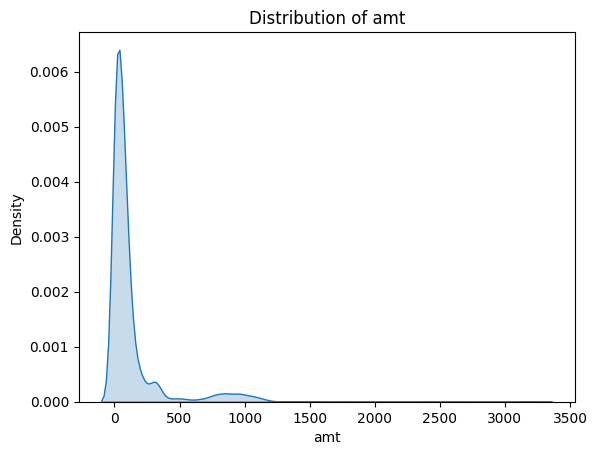

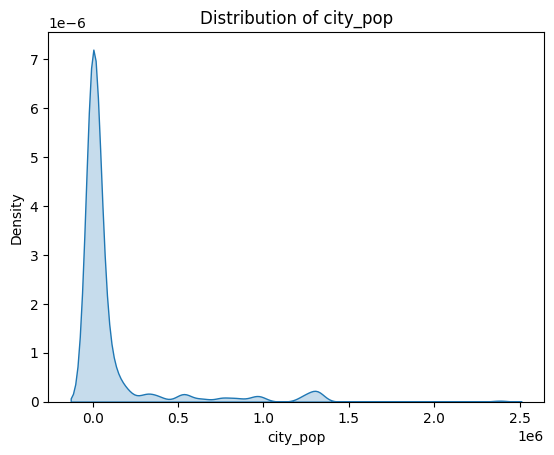

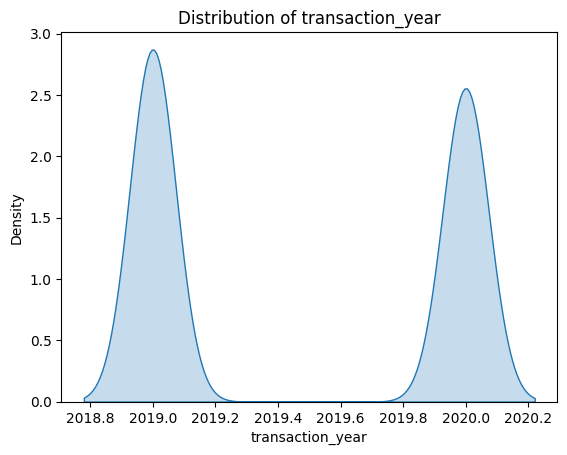

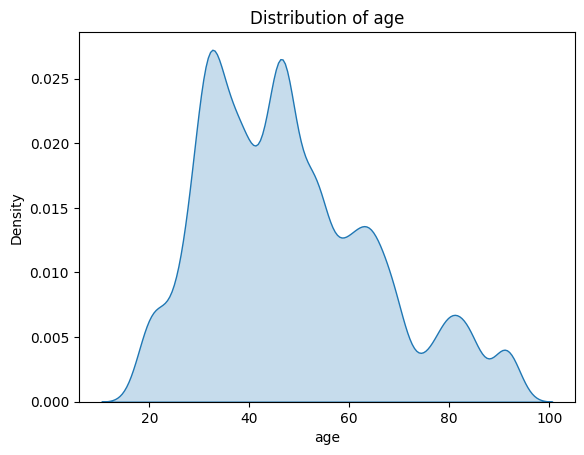

In [373]:
for col in continuous_cols:
    sns.kdeplot(df[col], fill=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [374]:
print(df[continuous_cols].skew().sort_values())

transaction_year    0.116799
age                 0.643172
amt                 3.490742
city_pop            3.658077
dtype: float64


**Removing Outlires using IQR method**

In [375]:
df['log_amt'] = np.log1p(df['amt'])

Text(0.5, 0, 'log_amt')

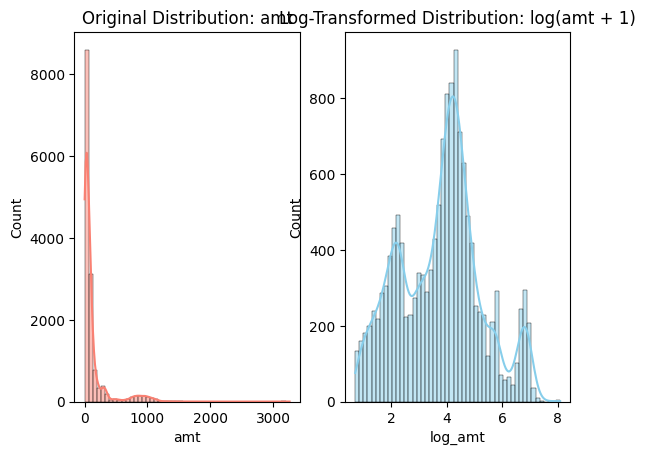

In [376]:
# Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['amt'], bins=50, kde=True, color='salmon')
plt.title("Original Distribution: amt")
plt.xlabel("amt")

# Log-Transformed Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['log_amt'], bins=50, kde=True, color='skyblue')
plt.title("Log-Transformed Distribution: log(amt + 1)")
plt.xlabel("log_amt")

In [377]:
df['city_pop_log'] = np.log1p(df['city_pop'])

Text(0.5, 0, 'city_pop_log')

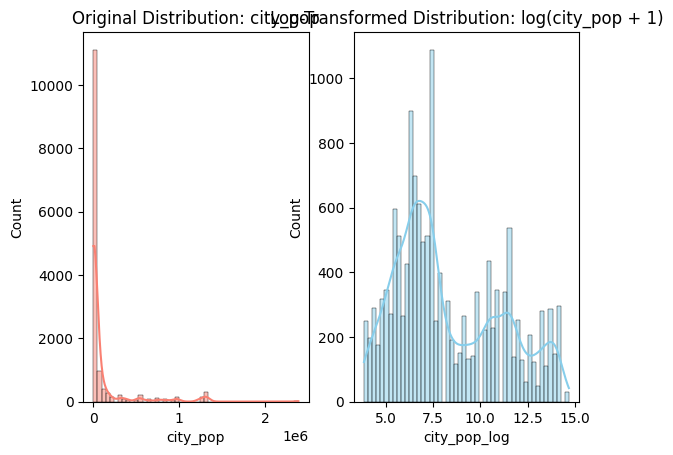

In [378]:
# Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['city_pop'], bins=50, kde=True, color='salmon')
plt.title("Original Distribution: city_pop")
plt.xlabel("city_pop")

# Log-Transformed Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['city_pop_log'], bins=50, kde=True, color='skyblue')
plt.title("Log-Transformed Distribution: log(city_pop + 1)")
plt.xlabel("city_pop_log")

In [379]:
cols = ['age', 'transaction_year', 'city_pop_log', 'log_amt']

def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply
df_cleaned = remove_outliers_iqr(df, cols)

print(f"Original: {df.shape[0]} rows")
print(f"After IQR Outlier Removal: {df_cleaned.shape[0]} rows")


Original: 14444 rows
After IQR Outlier Removal: 14439 rows


In [380]:
df_cleaned.columns

Index(['category', 'amt', 'city', 'state', 'city_pop', 'is_fraud',
       'transaction_year', 'transaction_month', 'professions', 'age',
       'log_amt', 'city_pop_log'],
      dtype='object')

In [381]:
df = df_cleaned.drop(columns=['amt','city_pop'])
df.columns

Index(['category', 'city', 'state', 'is_fraud', 'transaction_year',
       'transaction_month', 'professions', 'age', 'log_amt', 'city_pop_log'],
      dtype='object')

In [383]:
# Separate features and target
target = df["is_fraud"]
features = df.drop("is_fraud", axis=1)

# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=["object"]).columns
numerical_cols = features.drop(columns=categorical_cols)

# One-hot encode categorical columns and convert to int (0/1)
encoded_cats = pd.get_dummies(features[categorical_cols], drop_first=True).astype(int)

# Combine numerical + encoded
X_encoded = pd.concat([numerical_cols, encoded_cats], axis=1)

# add target back
df_final = pd.concat([X_encoded, target], axis=1)
print(df_final.head())

   transaction_year  transaction_month  age   log_amt  city_pop_log  \
0              2019                  4   80  2.732418      4.983607   
1              2019                  4   80  6.874312      4.983607   
2              2019                  4   80  3.924149      4.983607   
3              2019                  4   80  5.691237      4.983607   
4              2019                  4   80  2.953347      4.983607   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     1   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  ...  \
0                     0                        0  ...   
1                   

In [385]:
df_final.to_csv('credit_card_cleaned.csv',index=False)